# Stock Price Prediction Using Multiple Algorithms

## Introduction:


*   This part of the project aims to compare the effectiveness of three different models: Linear Regression, K-Nearest Neighbors (KNN), and Long Short-Term Memory (LSTM) — in predicting time series data. By evaluating these models, the project seeks to identify which method offers the best accuracy and reliability for stock price forecasting. This analysis is conducted as part of a BSCH Capstone Project.

## Project workflow
The workflow for this project is essentially in these steps:
*  Exploratory Data Analysis
*  Linear Regression
*  KNN
*  LSTM (Deep Learning)
*  Conclusion


# 1. Problem Understanding
### What are Stocks?
*  Stocks represent partial ownership in a company, giving shareholders a claim on the company’s assets and earnings. The more stock an individual owns, the greater their ownership stake and influence within the company.

### What is stock price prediction? 

*  Stock price prediction involves forecasting the future value of a company’s stock or other financial instruments traded on the stock market. Accurate predictions can lead to significant financial gains.
*  Stock market analysis generally falls into two main categories:
      1.   Fundamental analysis : involves analyzing a company’s financial statements to determine the fair value of the business. 
      2.   Technical analysis : This approach looks at patterns in the stock’s price and trading volume to predict future movements, assuming that all available information is already reflected in the price.

We will use a dataset from Kaggle for our analysis.

### Let's load dataset and packages:

In [5]:
#import packages
import pandas as pd
import numpy as np
import datetime

#to plot within notebook
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (20, 10)

#plotting configurations
%matplotlib inline

In [6]:
#read the file
df = pd.read_csv(r"WebApp\Google_dataset.csv")
#convert Date to datetime and set it as the index if needed
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)

In [7]:
#rows and columns 
df.shape

(4979, 6)

In [8]:
#print datatypes
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
#if null
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#print the tail
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-16,174.600006,176.339996,174.050003,175.429993,175.429993,17247300
2024-05-17,175.550003,177.494995,174.979996,177.289993,177.289993,16546400
2024-05-20,177.309998,179.949997,177.225006,178.460007,178.460007,17495100
2024-05-21,178.399994,179.820007,177.309998,179.539993,179.539993,14706000
2024-05-22,178.399994,178.852005,176.779999,178.000000,178.000000,16189400
2024-05-23,178.779999,179.910004,174.539993,175.059998,175.059998,14928400
2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15005100


### Variables in our dataset :

*  Date : Represents the date of the stock data entry.
*  Open & Close : represents the starting and the final price of the stock in a day.
*  Low & High : represent the Low , High prices of the stock during the day.
*  Adj Close : The adjusted closing price of the stock, which accounts for any corporate actions (like dividends or stock splits).
*  Volume : The number of shares traded on that day.

### Let's now plot "Close".

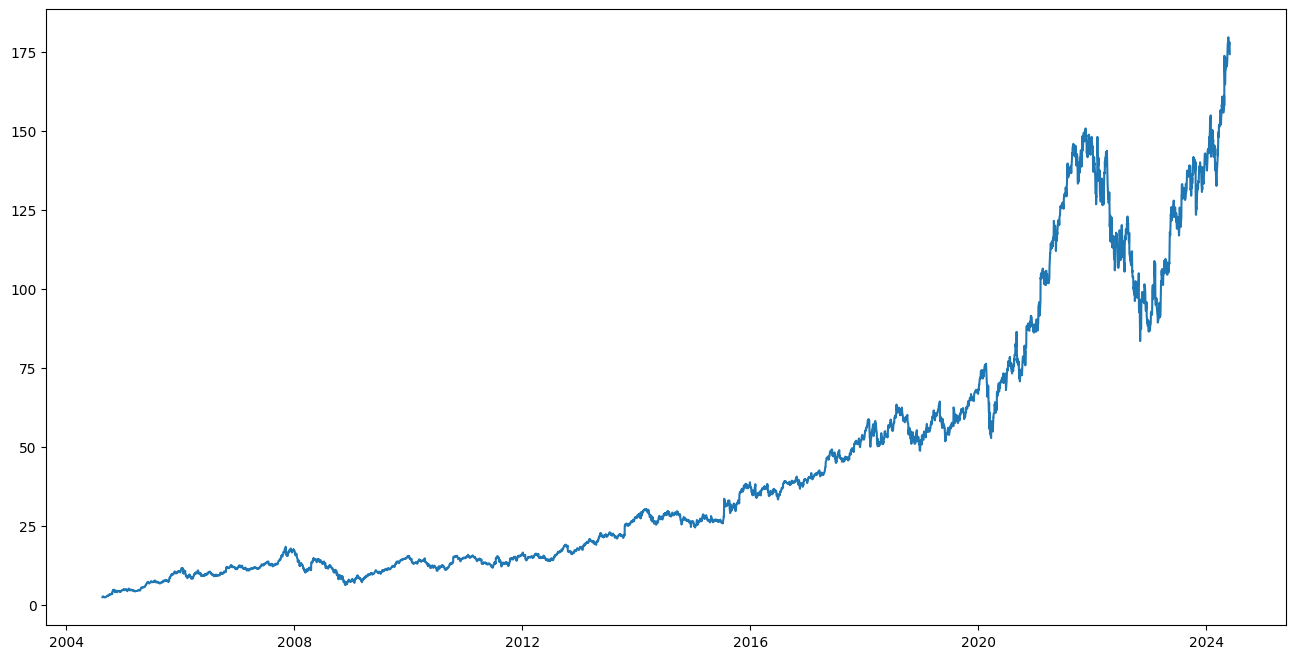

In [13]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [14]:
print(f'Dataframe contains stock prices between {df.index.min().date()} and {df.index.max().date()}')
print(f'Total days = {(df.index.max() - df.index.min()).days} days')

Dataframe contains stock prices between 2004-08-19 and 2024-05-30
Total days = 7224 days


### Function to train on 30 days and predict 5:

In [16]:
#function to create features and target
def create_features_and_target(data, past_days, future_days):
    X, y = [], []
    for i in range(len(data) - past_days - future_days + 1):
        X.append(data.iloc[i:i + past_days].values.flatten())
        y.append(data.iloc[i + past_days:i + past_days + future_days].values.flatten())
    return np.array(X), np.array(y)

#set past and future days
past_days = 30
future_days = 5

# Linear Regression

### Introduction : 
Let's start by the most basic algorithm that can be implimented on this usecase.

*  Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). It works by fitting a straight line through the data points that best represents the relationship between them.


### Implementation :

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.


In [18]:
#import packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
#creating new datasets
dataClose = df[['Close']]

In [20]:
#create features and targets
X, y = create_features_and_target(dataClose, past_days, future_days)

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
#scale data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

#scale target data
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [22]:
#initialize the Linear Regression model
lr_model = LinearRegression()

#train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
#make predictions
LR_pred = lr_model.predict(X_test)

In [24]:
#inverse transform predictions and actual values
LR_pred_rescaled = scaler_y.inverse_transform(LR_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

Mean Squared Error: 14.849461425266133


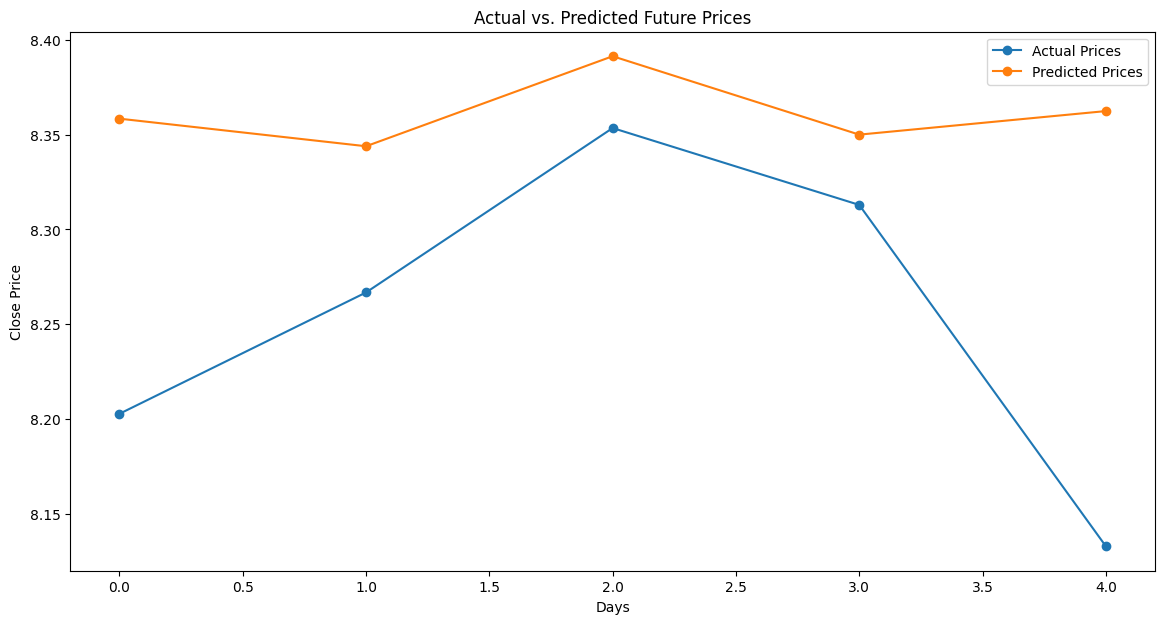

In [25]:
#calculate Mean Squared Error
mse_lr = mean_squared_error(y_test_rescaled, LR_pred_rescaled)
print(f'Mean Squared Error: {mse_lr}')

#plot the results for the last 5 days in the test set
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test[0])), y_test[-1], label='Actual Prices', marker='o')
plt.plot(range(len(LR_pred[0])), LR_pred[-1], label='Predicted Prices', marker='o')
plt.title('Actual vs. Predicted Future Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

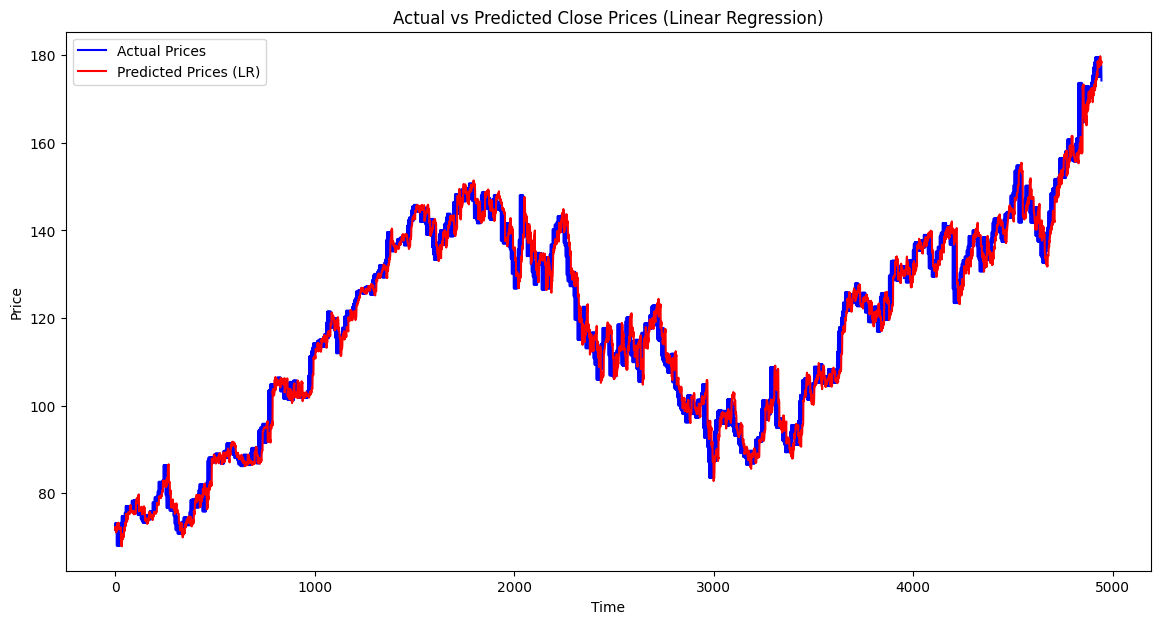

In [26]:
#plot Linear Regression results
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_rescaled.flatten())), y_test_rescaled.flatten(), label='Actual Prices', color='blue')
plt.plot(range(len(LR_pred_rescaled.flatten())), LR_pred_rescaled.flatten(), label='Predicted Prices (LR)', color='red')
plt.title('Actual vs Predicted Close Prices (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion :
In fact, Linear Regression is a simple algorithm that can be implemented quickly, but it has a few cons which are affecting forecasting. Linear regression is typically not effective when there are many features or when the relationships among features are complex. In stock prediction, factors like market sentiment, economic indicators, and other variables may all interact in complex ways. But in this example Linear Regression did not too bad. However, this is not enough to successfully predict stocks.

# k-Nearest Neighbours Regression

### Introduction : 
Let's now dive in with another known algorithm:
*  the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In this approach, the prediction is based on the 'k' closest training examples in the feature space, making it a straightforward and intuitive model for various applications.


### Implementation :

We will use the same dataset (train and validation).

In [29]:
#import packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

### Gridsearch for finding the best parameter:

In [31]:
#initialize KNeighborsRegressor
knn = KNeighborsRegressor()

#define the parameter grid
knn = KNeighborsRegressor()
params = {'n_neighbors': range(1, 21)}
knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)})

In [32]:
#get the best parameters
best_params = knn_model.best_params_
print(f'Best parameters: {best_params}')
#make predictions
KNN_pred = knn_model.predict(X_test)
#rescale
scaler_y = StandardScaler().fit(y_train)  #use the scaler fitted on y_train
KNN_pred_rescaled = scaler_y.inverse_transform(KNN_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

Best parameters: {'n_neighbors': 1}


Mean Squared Error: 9.17150290930127


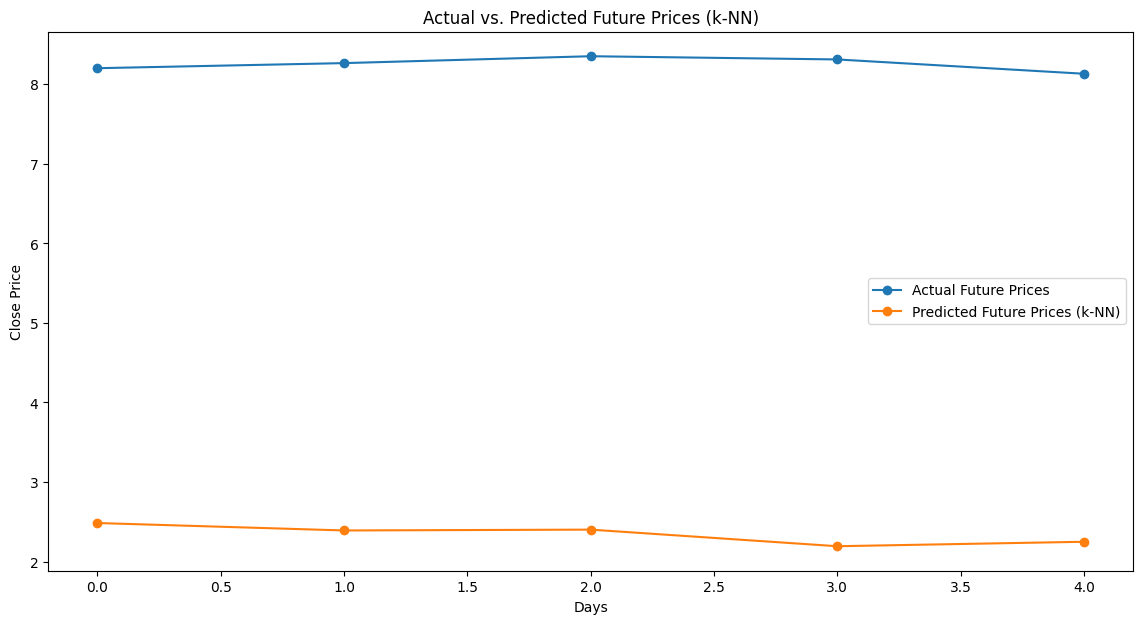

In [33]:
#calculate Mean Squared Error
mse_knn = mean_squared_error(y_test_rescaled, KNN_pred_rescaled)
print(f'Mean Squared Error: {mse_knn}')

#plot the results for the last 5 days in the test set
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_rescaled[0])), y_test_rescaled[-1], label='Actual Future Prices', marker='o')
plt.plot(range(len(KNN_pred_rescaled[0])), KNN_pred_rescaled[-1], label='Predicted Future Prices (k-NN)', marker='o')
plt.title('Actual vs. Predicted Future Prices (k-NN)')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

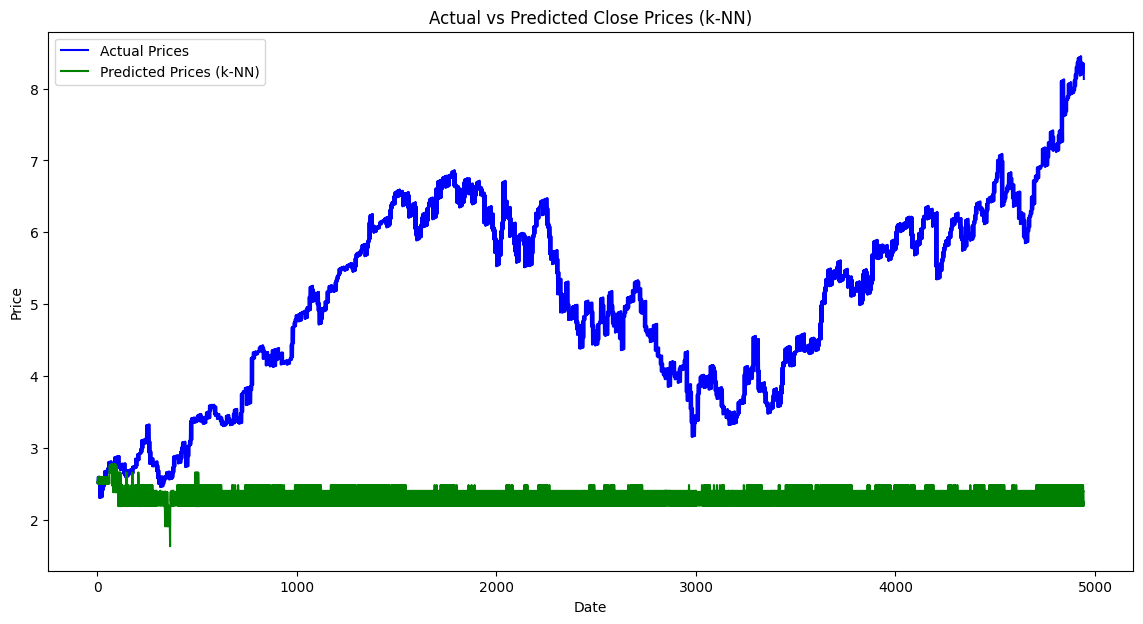

In [34]:
#plot k-NN results
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_rescaled.flatten())), y_test_rescaled.flatten(), label='Actual Prices', color='blue')
plt.plot(range(len(KNN_pred_rescaled.flatten())), KNN_pred_rescaled.flatten(), label='Predicted Prices (k-NN)', color='green')
plt.title('Actual vs Predicted Close Prices (k-NN)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion :
The KNN regression algorithm did not do well at all. The reason to this is probably because of high-dimensional data. As the number of features increases, this weakness can cause the distance between points to become less meaningful.This can lead to poor performance.

# Long Short-Term Memory (LSTM) - RNN

### Introduction : 
Given that traditional machine learning algorithms might not perform well with time series data, we turn to deep learning for a better approach. Specifically, Recurrent Neural Networks (RNNs) are suited for this type of data, and among them, Long Short-Term Memory (LSTM) networks are particularly effective.

* LSTMs are a type of RNN designed to capture long-term dependencies in data. They are well-suited for tasks where remembering information over extended periods is crucial.

LSTM has three gates:

* The input gate: Controls the addition of new information to the cell state.
* The forget gate: Decides which information to discard from the cell state.
* The output gate: Determines which information to output from the cell state.

### Implementation :

For now, let us implement LSTM and check it’s performance on our particular data.

In [37]:
#import libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

In [38]:
#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataClose)

In [39]:
#function to create dataset with specified time steps
def create_dataset(data, time_step=30, forecast_length=5):
    X, y = [], []
    for i in range(len(data) - time_step - forecast_length):
        X.append(data[i:(i + time_step), 0])
        y.append(data[(i + time_step):(i + time_step + forecast_length), 0])
    return np.array(X), np.array(y)

#create the dataset
time_step = 30  # Based on previous 30 days
forecast_length = 5  # Predict the next 5 days
X, y = create_dataset(scaled_data, time_step, forecast_length)

In [40]:
#reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], y.shape[1])

In [41]:
#split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [42]:
#define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=forecast_length)) 
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [43]:
#train the model
history = model.fit(X_train, y_train, epochs=11, batch_size=32, verbose=1, validation_split=0.2)

#make predictions with the LSTM model
predictions = model.predict(X_test)

Epoch 1/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.1926 - loss: 0.0025 - mae: 0.0321 - val_accuracy: 0.2111 - val_loss: 7.7591e-04 - val_mae: 0.0214
Epoch 2/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2052 - loss: 1.3775e-04 - mae: 0.0082 - val_accuracy: 0.3375 - val_loss: 2.9628e-04 - val_mae: 0.0116
Epoch 3/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2057 - loss: 1.1647e-04 - mae: 0.0074 - val_accuracy: 0.1985 - val_loss: 2.3069e-04 - val_mae: 0.0105
Epoch 4/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2104 - loss: 8.8024e-05 - mae: 0.0066 - val_accuracy: 0.1416 - val_loss: 2.4798e-04 - val_mae: 0.0121
Epoch 5/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2017 - loss: 8.0804e-05 - mae: 0.0061 - val_accuracy: 0.1517 - val_loss: 2.3352e-04 - val_mae: 0.0119
Epoch 6/11
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2027 - loss: 6.9632e-05 - mae: 0.0057 - val_accuracy: 0.3375 - val_loss: 2.8393e-04 - val_mae: 0.0140
Ep

In [44]:
predictions_rescaled = scaler_y.inverse_transform(predictions)

#rescale y_test for LSTM
y_test_rescaled = scaler_y.inverse_transform(y_test)

In [45]:
# Check shapes after rescaling
print("y_test_rescaled shape:", y_test_rescaled.shape)
print("predictions_rescaled shape:", predictions_rescaled.shape)

y_test_rescaled shape: (989, 5)
predictions_rescaled shape: (989, 5)


Mean Squared Error (LSTM): 0.00239696049222997


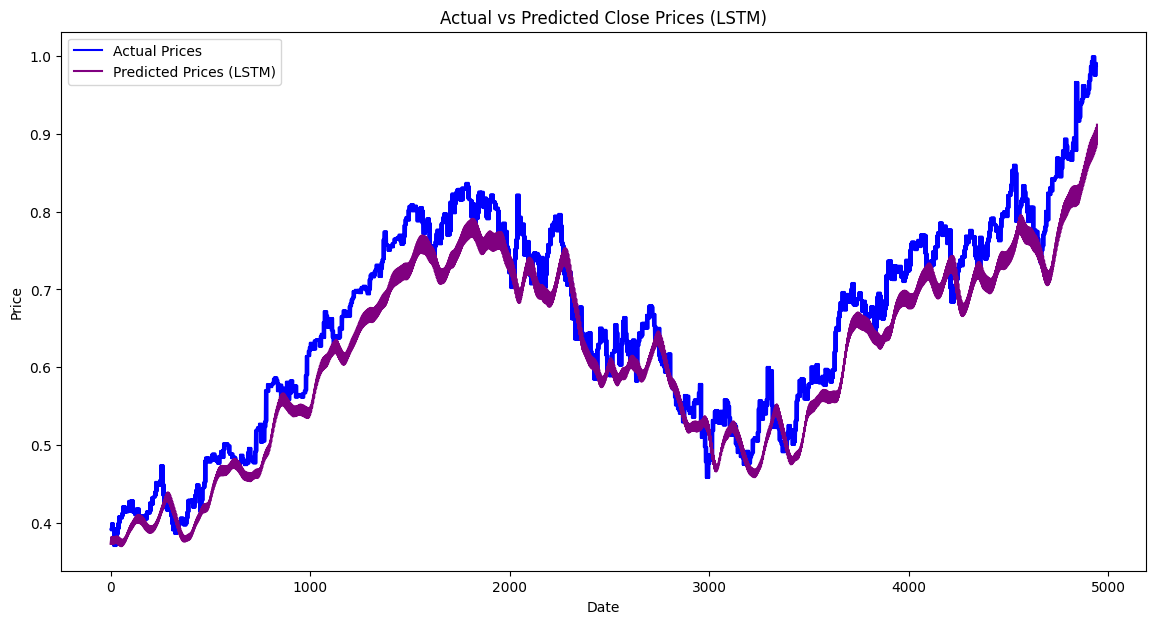

In [46]:
#calculate Mean Squared Error for LSTM
mse_lstm = mean_squared_error(y_test_rescaled.flatten(), predictions_rescaled.flatten())
print(f'Mean Squared Error (LSTM): {mse_lstm}')

#plot LSTM results
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_rescaled.flatten())), y_test_rescaled.flatten(), label='Actual Prices', color='blue')
plt.plot(range(len(predictions_rescaled.flatten())), predictions_rescaled.flatten(), label='Predicted Prices (LSTM)', color='purple')
plt.title('Actual vs Predicted Close Prices (LSTM)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Conclusion
The LSTM model demonstrated impressive performance in predicting future stock prices, as evidenced by its relatively low Mean Squared Error (MSE) compared to other models.

## Correlation Matrix
Visualization of the correlation matrix between three different machine models to see how similar or different predictions are:

In [49]:
#import seaborn
import seaborn as sns

In [50]:
#create a DataFrame to store predictions from each model
predictions_df = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'LinearRegression': LR_pred_rescaled.flatten(),
    'KNN': KNN_pred_rescaled.flatten(),
    'LSTM': predictions_rescaled.flatten()
})

#calculate the correlation matrix
correlation_matrix = predictions_df.corr()
print(correlation_matrix)

                    Actual  LinearRegression       KNN      LSTM
Actual            1.000000          0.991100 -0.062264  0.976242
LinearRegression  0.991100          1.000000 -0.060872  0.983196
KNN              -0.062264         -0.060872  1.000000 -0.084446
LSTM              0.976242          0.983196 -0.084446  1.000000


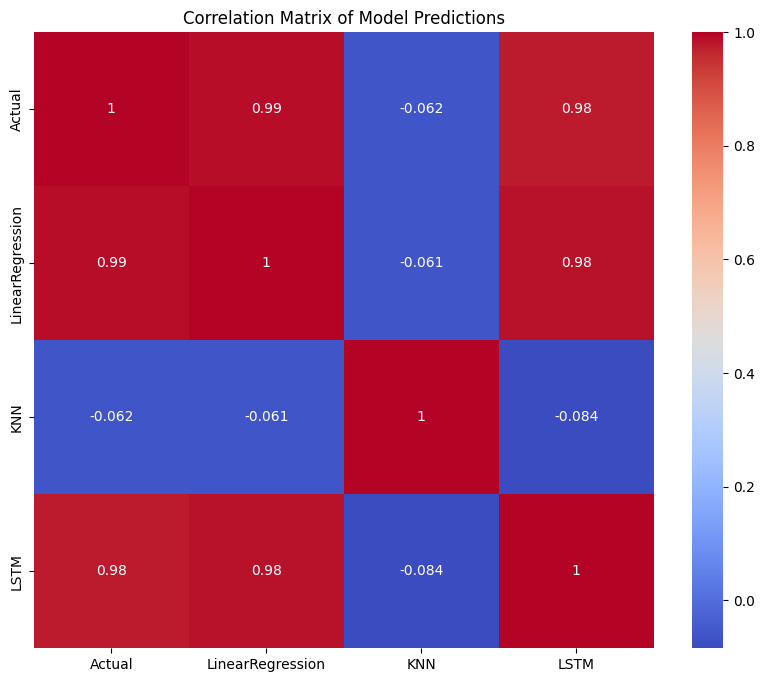

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Model Predictions')
plt.show()

### Explanation :
1. Diagonal Values (1.000000)
    * The diagonal values are always 1.000000, indicating a perfect correlation of each variable with itself.
2. Actual vs. Linear Regression (0.990941)
    * The correlation between the actual stock prices and the Linear Regression model predictions is very high (0.990941). This suggests that the Linear Regression model's predictions closely match the actual values, indicating that it is performing well in capturing the trends in the stock prices.
3. Actual vs. k-NN (-0.109635)
    * The correlation between the actual stock prices and the k-NN model predictions is slightly negative (-0.109635). This indicates a weak and slightly inverse relationship, suggesting that the k-NN model might not be predicting the stock prices accurately, at least in comparison to the other models. The negative correlation implies that the k-NN predictions sometimes move in the opposite direction of the actual stock prices.
4. Actual vs. LSTM (0.976408)
    * The correlation between the actual stock prices and the LSTM model predictions is also very high (0.976408), almost as high as the Linear Regression model. This implies that the LSTM model is quite effective in predicting the stock prices and captures the trends well, similar to the Linear Regression model.

5. Linear Regression vs. k-NN (-0.099425)
    * This suggests that these two models are making different types of predictions.
7. Linear Regression vs. LSTM (0.984274)
    * The correlation between the Linear Regression and LSTM predictions is very high (0.984274), which implies that both models are making similar predictions.
9. k-NN vs. LSTM (-0.105088)
    * This suggests that the k-NN model's predictions are not aligning well with either the Linear Regression or the LSTM model.

## Training and Validation Accuracy Graphs
#### For LSTM:
* Neural networks, including LSTMs, can inherently track metrics like loss and accuracy during training and validation.

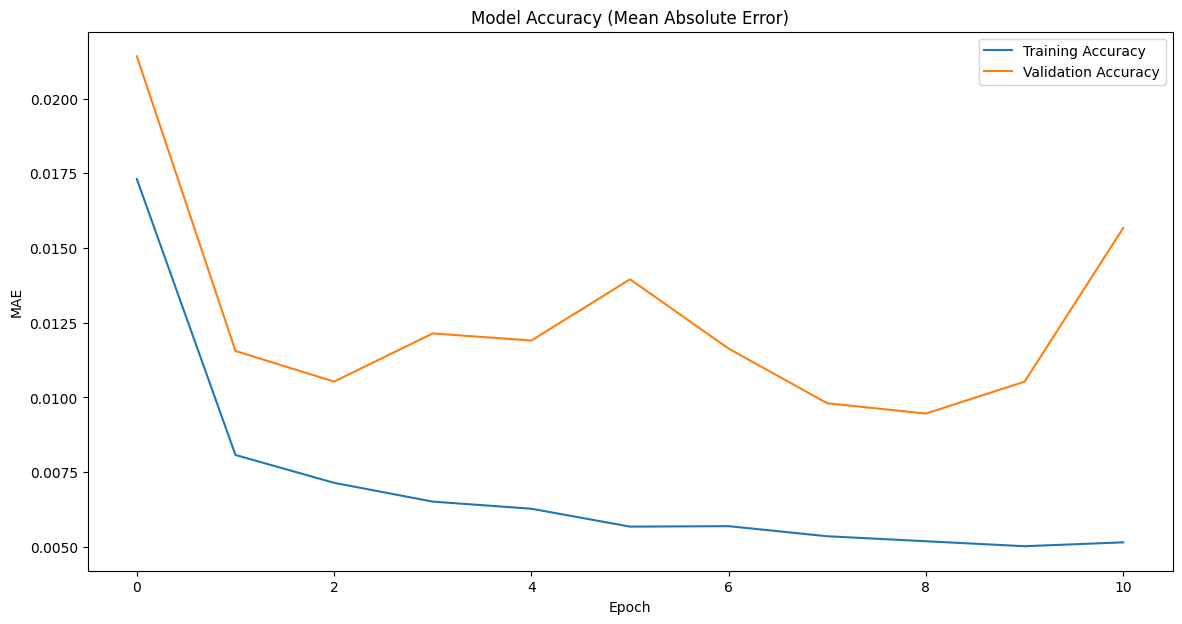

In [54]:
#plot training & validation accuracy values
plt.figure(figsize=(14, 7))
plt.plot(history.history['mae'], label='Training Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.title('Model Accuracy (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

A lower MAE value indicates better model performance, as it means the predictions are closer to the actual values.
* Decreasing Training MAE: A consistent decrease in training MAE over epochs indicates that the model is learning and fitting the training data well. This is generally a positive sign.
* Decreasing Validation MAE: If the validation MAE decreases along with the training MAE, it indicates that the model is not only learning the training data but also generalizing well to new data. This is ideal.

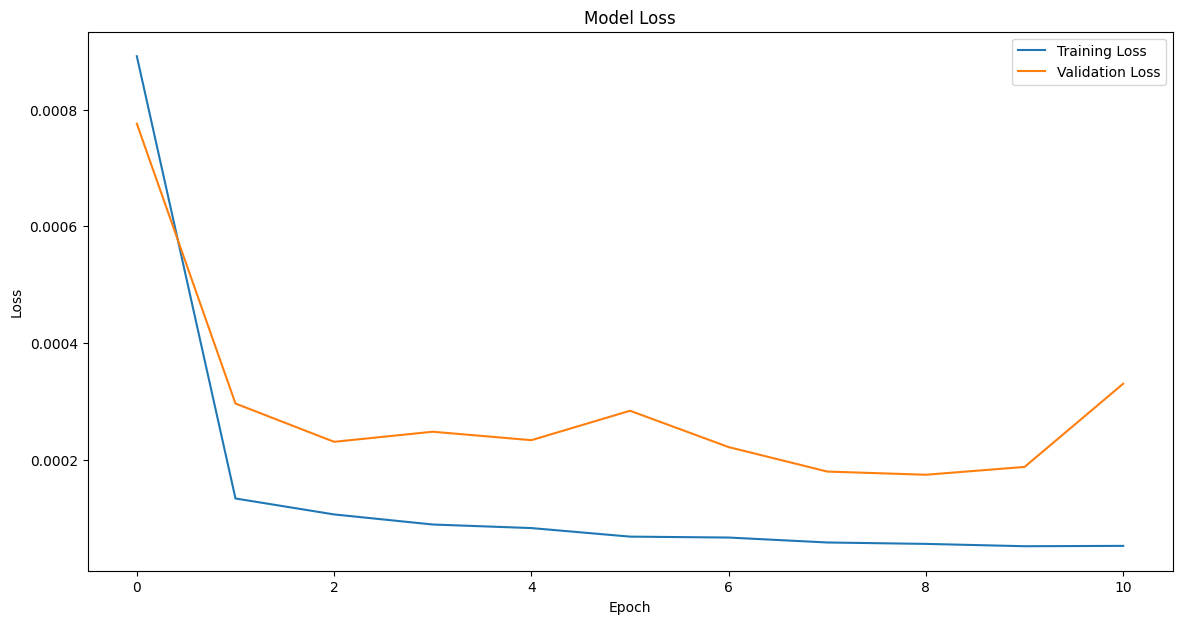

In [56]:
#plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Same idea as in MAE. A decreasing validation loss with a decreasing training loss indicate that the model is not only learning the training data but also generalizing well to new data. This is the ideal scenario.

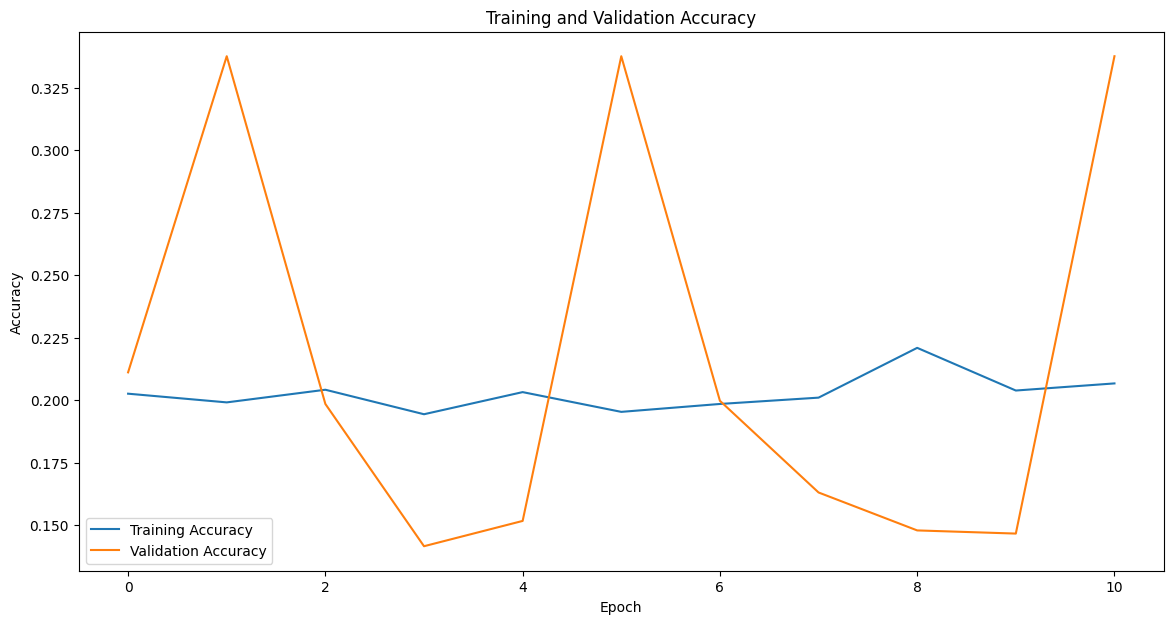

In [58]:
# Plot training and validation accuracy
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfitting and Underfitting Detection: The graph helps in identifying if the model is overfitting (high training accuracy but low validation accuracy) or underfitting (low accuracy on both training and validation data).
* The model performs well on the training data but poorly on the validation data, suggesting it has learned to memorize the training data rather than generalize from it.

## In Summary,
the LSTM model's ability to capture temporal relationships and its effectiveness in handling sequential data made it well-seuited for predicting stock prices. Its success highlights the importance of leveraging specialized architectures like LSTMs for time-series forecasting tasks where understanding the sequence and timing of data is crucial.